In [1]:
!unzip /content/diabetes_prediction.zip

Archive:  /content/diabetes_prediction.zip
replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes.csv            


y

In [2]:
import pandas as pd # Import the pandas library

# Assuming your unzipped file contains a CSV named 'diabetes.csv'
df = pd.read_csv('diabetes.csv')  # Load the data into a DataFrame named 'diabetes'

df.head()  # Now this should work correctly

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.shape

(768, 9)

In [7]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [8]:
df.duplicated().sum()

0

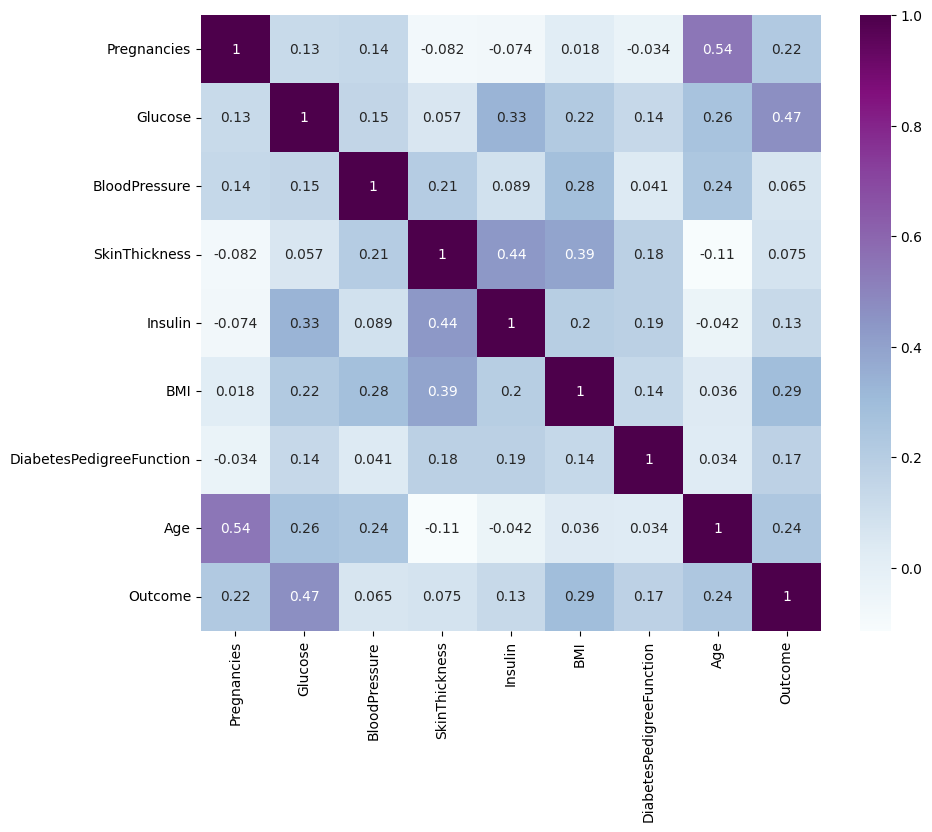

In [9]:
corr=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap="BuPu")
plt.show()

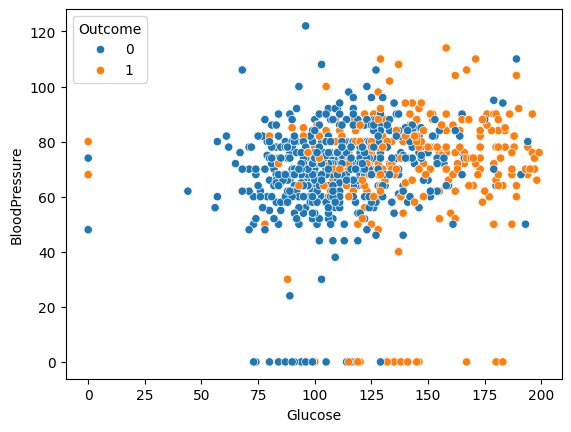

In [10]:
sns.scatterplot(data=df, x="Glucose", y="BloodPressure",hue="Outcome")
plt.show()

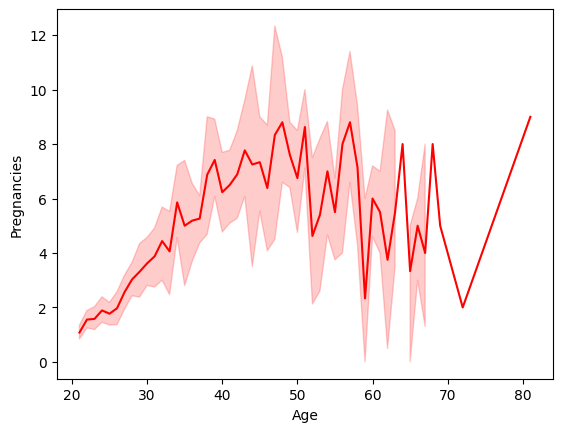

In [11]:
sns.lineplot(data=df, x="Age", y="Pregnancies",color="red")
plt.show()

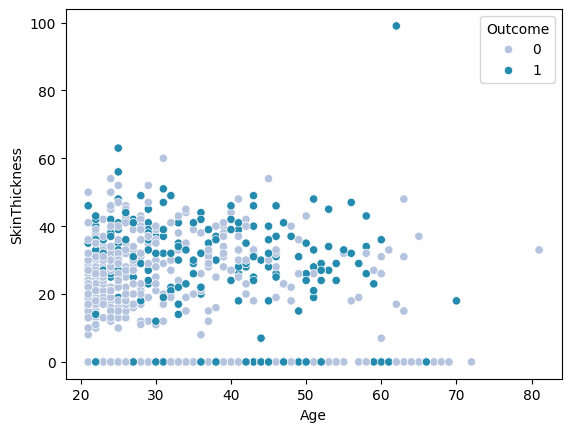

In [12]:
sns.scatterplot(data=df, x="Age", y="SkinThickness",hue="Outcome",palette="PuBuGn")
plt.show()

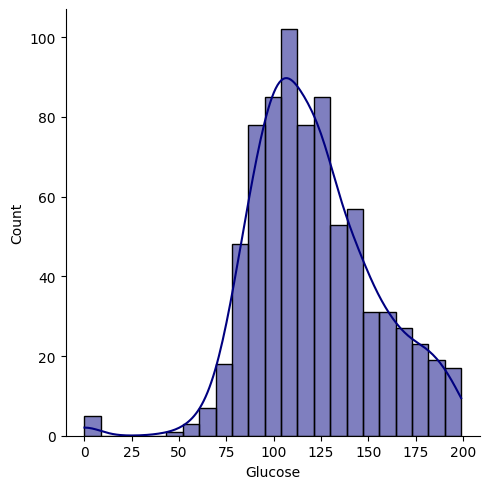

In [13]:
sns.displot(data=df, x="Glucose",color="navy",kde=True)
plt.show()

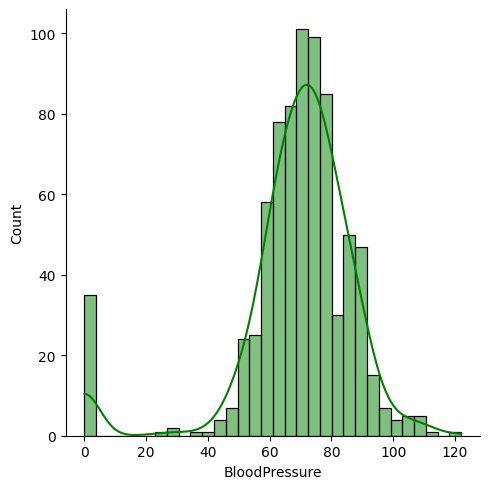

In [14]:
sns.displot(data=df, x="BloodPressure",color="green",kde=True)
plt.show()

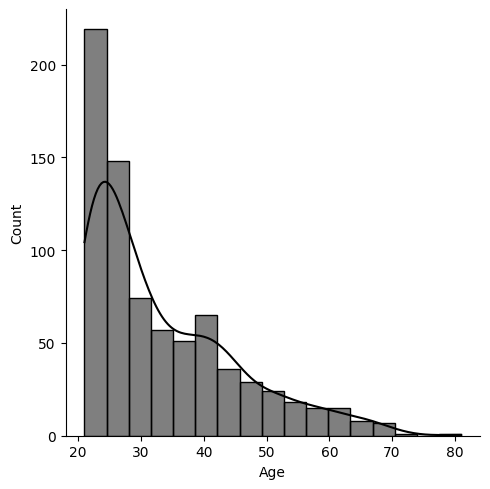

In [15]:
sns.displot(data=df, x="Age",color="black",kde=True)
plt.show()

<ipython-input-16-a2331cf255de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Outcome",data=df,palette="Set2")


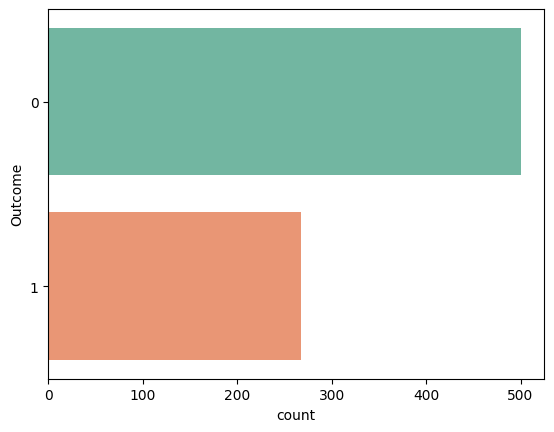

In [16]:
sns.countplot(y="Outcome",data=df,palette="Set2")
plt.show()

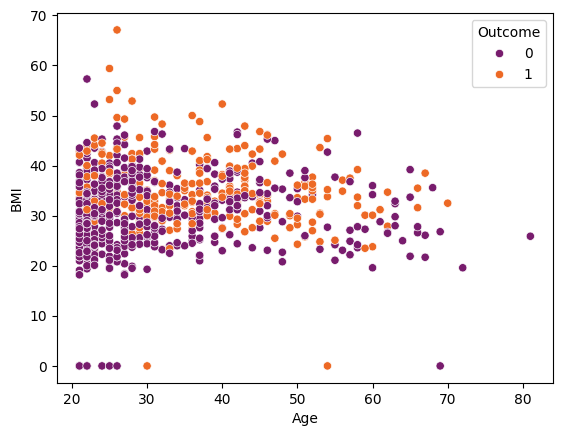

In [17]:
sns.scatterplot(data=df, x="Age", y="BMI",hue="Outcome",palette="inferno")
plt.show()


In [18]:
X=df.drop(columns="Outcome",axis=1)
Y=df["Outcome"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [21]:
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, accuracy_score


# F1 score
f1 = f1_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
# Print or use these scores as needed
print("F1 Score:", f1)
print("Recall:", recall)
print("Precision:", precision)
print("ROC AUC Score:", roc_auc)
print("Accuracy Score:", accuracy)

F1 Score: 0.6666666666666666
Recall: 0.7090909090909091
Precision: 0.6290322580645161
ROC AUC Score: 0.7383838383838384
Accuracy Score: 0.7467532467532467


In [22]:
!pip install --upgrade scipy scikit-plot

  Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached scipy-1.15.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (37.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3


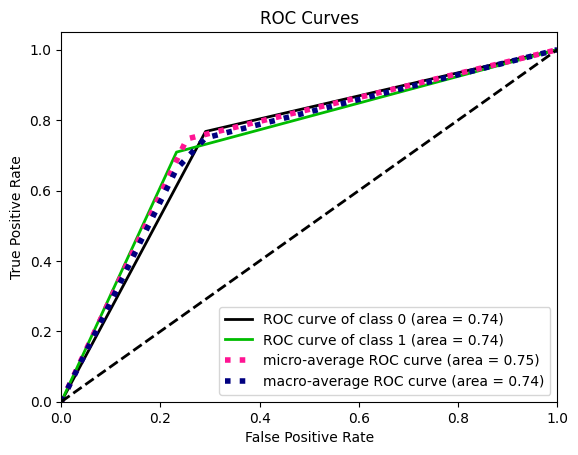

In [23]:
!pip install --upgrade scikit-learn scipy matplotlib

import scikitplot as skplt
import matplotlib.pyplot as plt
from scipy import interpolate # Import the interpolate module


y_probas = dt.predict_proba(X_test)

# Replace skplt.metrics.plot_roc with a custom implementation using interp1d
# if skplt.metrics.plot_roc still uses the deprecated interp function

# Example of how to replace interp with interp1d in your context:
# Assuming you have 'fpr', 'tpr', and 'thresholds' from your ROC curve
# fpr, tpr, thresholds = roc_curve(...)

# Instead of:
# mean_tpr = interp(mean_fpr, fpr, tpr)

# Use:
# f = interpolate.interp1d(fpr, tpr)
# mean_tpr = f(mean_fpr)

skplt.metrics.plot_roc(y_test, y_probas)
plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
pred1=rf.predict(X_test)

In [26]:
# F1 score
f10 = f1_score(y_test,pred1)

# Recall
recall0 = recall_score(y_test,pred1)

# Precision
precision0 = precision_score(y_test, pred1)

# ROC AUC score
roc_auc0 = roc_auc_score(y_test,pred1)

# Accuracy score
accuracy0 = accuracy_score(y_test,pred1)

# Print or use these scores as needed
print("F1 Score:", f10)
print("Recall:", recall0)
print("Precision:", precision0)
print("ROC AUC Score:", roc_auc0)
print("Accuracy Score:", accuracy0)

F1 Score: 0.6486486486486487
Recall: 0.6545454545454545
Precision: 0.6428571428571429
ROC AUC Score: 0.7262626262626263
Accuracy Score: 0.7467532467532467


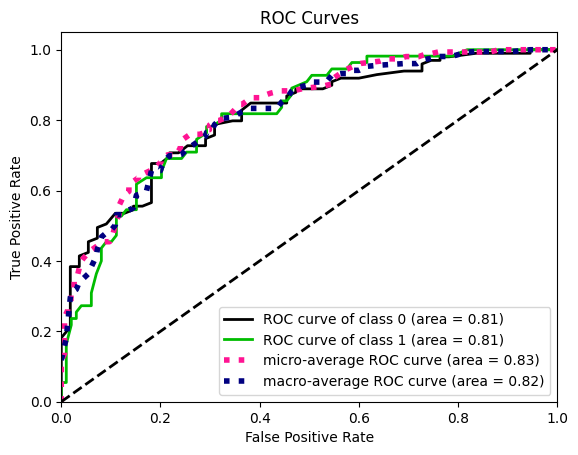

In [27]:
y_proba = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_proba)
plt.show()

LGBM CLASSIFIER


In [28]:
from lightgbm import LGBMClassifier
lgb=LGBMClassifier()
lgb.fit(X_train, y_train)
pred2=lgb.predict(X_test)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [29]:
# F1 score
f11 = f1_score(y_test,pred2)

# Recall
recall1 = recall_score(y_test,pred2)

# Precision
precision1 = precision_score(y_test, pred2)

# ROC AUC score
roc_auc1 = roc_auc_score(y_test,pred2)

# Accuracy score
accuracy1 = accuracy_score(y_test,pred2)

# Print or use these scores as needed
print("F1 Score:", f11)
print("Recall:", recall1)
print("Precision:", precision1)
print("ROC AUC Score:", roc_auc1)
print("Accuracy Score:", accuracy1)

F1 Score: 0.6386554621848739
Recall: 0.6909090909090909
Precision: 0.59375
ROC AUC Score: 0.7141414141414141
Accuracy Score: 0.7207792207792207


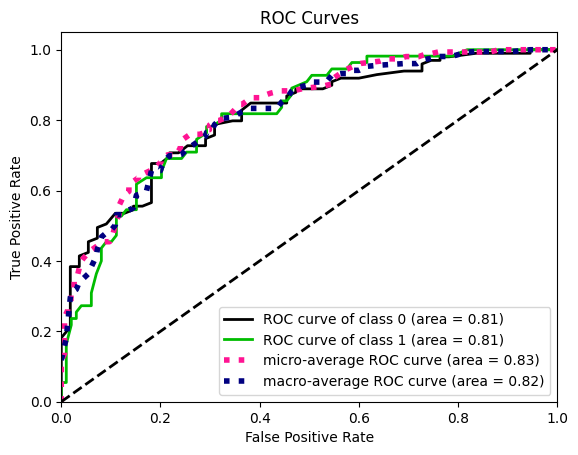

In [30]:
y_pro = rf.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_pro)
plt.show()

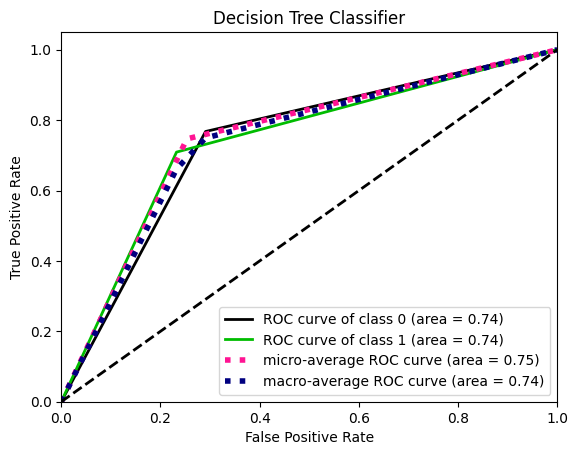

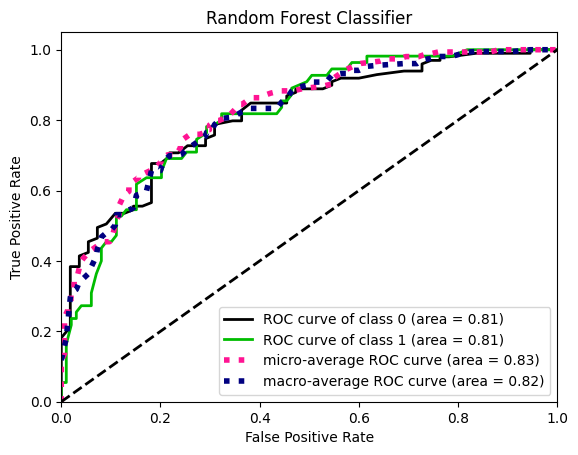

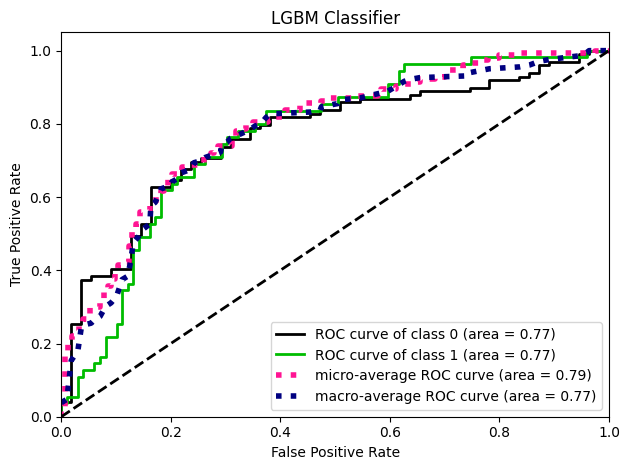

In [31]:
# Predict probabilities for each model
y_probas_dt = dt.predict_proba(X_test)
y_probas_rf = rf.predict_proba(X_test)
y_probas_lgb = lgb.predict_proba(X_test)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.close()
skplt.metrics.plot_roc(y_test, y_probas_dt)
plt.title('Decision Tree Classifier')
plt.show()

plt.subplot(1, 3, 2)
plt.close()
skplt.metrics.plot_roc(y_test, y_probas_rf)
plt.title('Random Forest Classifier')
plt.show()

plt.subplot(1, 3, 3)
plt.close()
skplt.metrics.plot_roc(y_test, y_probas_lgb)
plt.title('LGBM Classifier')

plt.tight_layout()
plt.show()


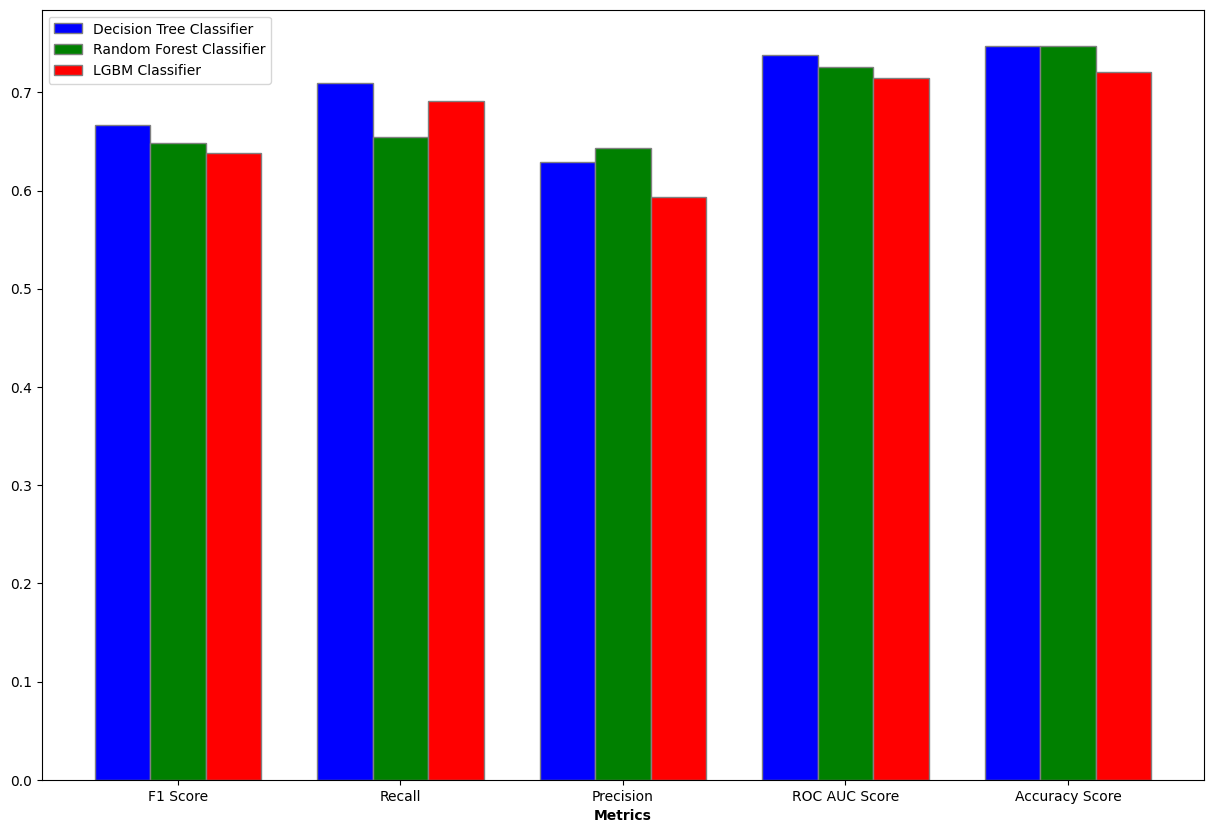

In [32]:
import numpy as np
plt.figure(figsize=(15,10))

# Metrics for Decision Tree Classifier
dt_metrics = [f1, recall, precision, roc_auc, accuracy]

# Metrics for Random Forest Classifier
rf_metrics = [f10, recall0, precision0, roc_auc0, accuracy0]

# Metrics for LGBM Classifier
lgb_metrics = [f11, recall1, precision1, roc_auc1, accuracy1]

# Create labels for the metrics
metrics_labels = ['F1 Score', 'Recall', 'Precision', 'ROC AUC Score', 'Accuracy Score']

# Set the width of the bars
bar_width = 0.25

# Set position of bar on X axis
r1 = np.arange(len(dt_metrics))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting the bar plot
plt.bar(r1, dt_metrics, color='b', width=bar_width, edgecolor='grey', label='Decision Tree Classifier')
plt.bar(r2, rf_metrics, color='g', width=bar_width, edgecolor='grey', label='Random Forest Classifier')
plt.bar(r3, lgb_metrics, color='r', width=bar_width, edgecolor='grey', label='LGBM Classifier')

# Add xticks on the middle of the group bars
plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(dt_metrics))], metrics_labels)

# Create legend & Show graphic
plt.legend()
plt.show()
